In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(42)

set1no = 900
set2no = 100

In [4]:
df1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0,scale=1,size=set1no),
    'feature_2': np.random.normal(loc=0,scale=1,size=set1no),
    'target': [0]*set1no
})
df2 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0,scale=1,size=set2no),
    'feature_2': np.random.normal(loc=0,scale=1,size=set2no),
    'target': [1]*set2no
})

In [7]:
df1.head()

,feature_1,feature_2,target
0,1.901191,0.386809,0
1,-0.060661,1.090980,0
2,-0.708407,2.012270,0
3,-1.513714,1.023710,0
4,-1.803140,0.249309,0


In [8]:
df2.head()

,feature_1,feature_2,target
0,-0.823935,1.065172,1
1,-0.719109,1.452617,1
2,2.049812,-0.916321,1
3,0.000683,-0.836921,1
4,0.782130,-0.140375,1


In [10]:
df = pd.concat([df1,df2]).reset_index(drop=True)

In [11]:
df

,feature_1,feature_2,target
0,1.901191,0.386809,0
1,-0.060661,1.090980,0
2,-0.708407,2.012270,0
3,-1.513714,1.023710,0
4,-1.803140,0.249309,0
...,...,...,...
995,-0.315087,-0.325611,1
996,-0.571746,-0.164335,1
997,0.332608,0.212093,1
998,0.933128,-0.993359,1


In [12]:
df['target'].unique()

array([0, 1], dtype=int64)

In [13]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [14]:
#upsampling
#downsampling

In [15]:
#UPSAMPLING

In [16]:
df_minority = df[df['target']==1]

In [17]:
df_minority

,feature_1,feature_2,target
900,-0.823935,1.065172,1
901,-0.719109,1.452617,1
902,2.049812,-0.916321,1
903,0.000683,-0.836921,1
904,0.782130,-0.140375,1
...,...,...,...
995,-0.315087,-0.325611,1
996,-0.571746,-0.164335,1
997,0.332608,0.212093,1
998,0.933128,-0.993359,1


In [19]:
df_majority = df[df['target']==0]

In [20]:
from sklearn.utils import resample

In [22]:
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

In [23]:
df_upsampled = pd.concat([df_majority,df_minority_upsampled])

In [25]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [27]:
df_majority_downsampled = resample(df_majority, replace=True, n_samples=len(df_minority), random_state=42)

In [28]:
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

In [29]:
df_downsampled['target'].value_counts()

target
1    100
0    100
Name: count, dtype: int64

In [30]:
# SMOTE (Synthetic Minority Over-sampling Technique)

In [31]:
df

,feature_1,feature_2,target
0,1.901191,0.386809,0
1,-0.060661,1.090980,0
2,-0.708407,2.012270,0
3,-1.513714,1.023710,0
4,-1.803140,0.249309,0
...,...,...,...
995,-0.315087,-0.325611,1
996,-0.571746,-0.164335,1
997,0.332608,0.212093,1
998,0.933128,-0.993359,1


In [33]:
import matplotlib.pyplot as plt

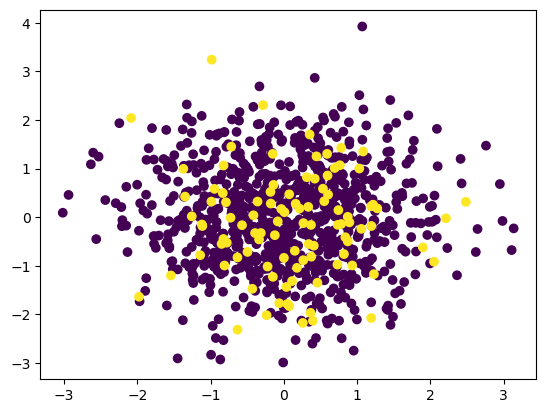

In [35]:
plt.scatter(df['feature_1'],df['feature_2'],c=df['target'])

In [36]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
oversample = SMOTE()

In [40]:
(X, y) = oversample.fit_resample(df[['feature_1','feature_2']], df['target'])

In [41]:
X

,feature_1,feature_2
0,1.901191,0.386809
1,-0.060661,1.090980
2,-0.708407,2.012270
3,-1.513714,1.023710
4,-1.803140,0.249309
...,...,...
1795,0.901744,-0.553200
1796,0.628981,0.960969
1797,0.743431,0.121087
1798,-0.305430,-1.364186


In [42]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1795    1
1796    1
1797    1
1798    1
1799    1
Name: target, Length: 1800, dtype: int64

In [43]:
oversample_df = pd.concat([X, y], axis=1)

In [46]:
oversample_df['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

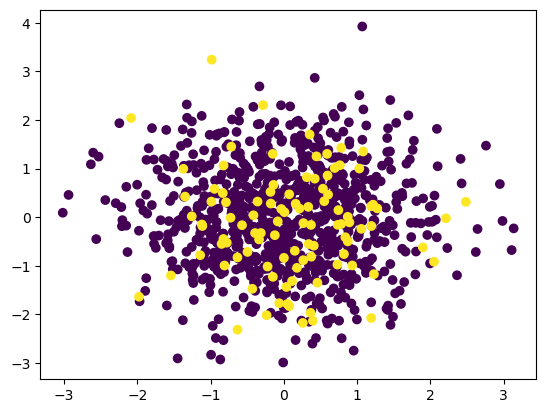

In [47]:
plt.scatter(df['feature_1'], df['feature_2'], c=df['target'])

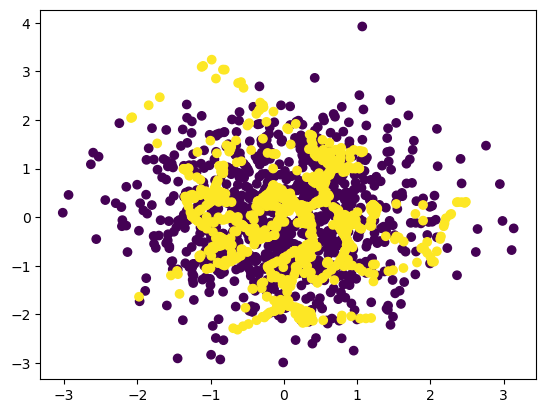

In [48]:
plt.scatter(oversample_df['feature_1'], oversample_df['feature_2'], c=oversample_df['target'])